# DATA VISUALIZATION

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

In [2]:
df = pd.read_csv('./cleaned_final_dataset.csv')
df.head()

,Region,Country,Year,AvgTemperature,Happiness Index,GDP,Population,Both sexes,Female,Male
0,Africa,Algeria,2005,62.913425,5.466833,3131.328300,32956690.0,3.82,2.80,4.83
1,Africa,Algeria,2006,64.930411,5.466833,3500.134528,33435080.0,3.65,2.66,4.63
2,Africa,Algeria,2007,63.166849,5.466833,3971.803658,33983827.0,3.46,2.51,4.41
3,Africa,Algeria,2008,63.532240,5.466833,4946.563793,34569592.0,3.31,2.40,4.22
4,Africa,Algeria,2009,64.259726,5.466833,3898.478923,35196037.0,3.15,2.29,4.02


1. Scatter Plot of Suicide Rates vs. GDP: This scatter plot shows the relationship between GDP and suicide rates.The scatter plot helps determine whether countries with higher GDP tend to have higher or lower suicide rates.

There doesn't appear to be a strong upward or downward trend in suicide rates as GDP increases. This suggests that GDP alone may not be a strong predictor of suicide rates.

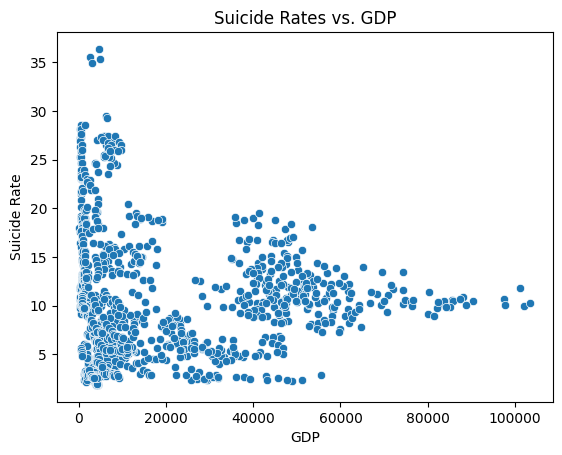

In [3]:
df = pd.read_csv('./cleaned_final_dataset.csv')
sns.scatterplot(data = df, x = 'GDP', y = 'Both sexes')
plt.xlabel('GDP')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rates vs. GDP')
plt.show()

2. Bar Plot of Suicide Rates by Country  

This bar plot compares suicide rates across Top10 countries. This visualization highlights which countries have the highest or lowest suicide rates.

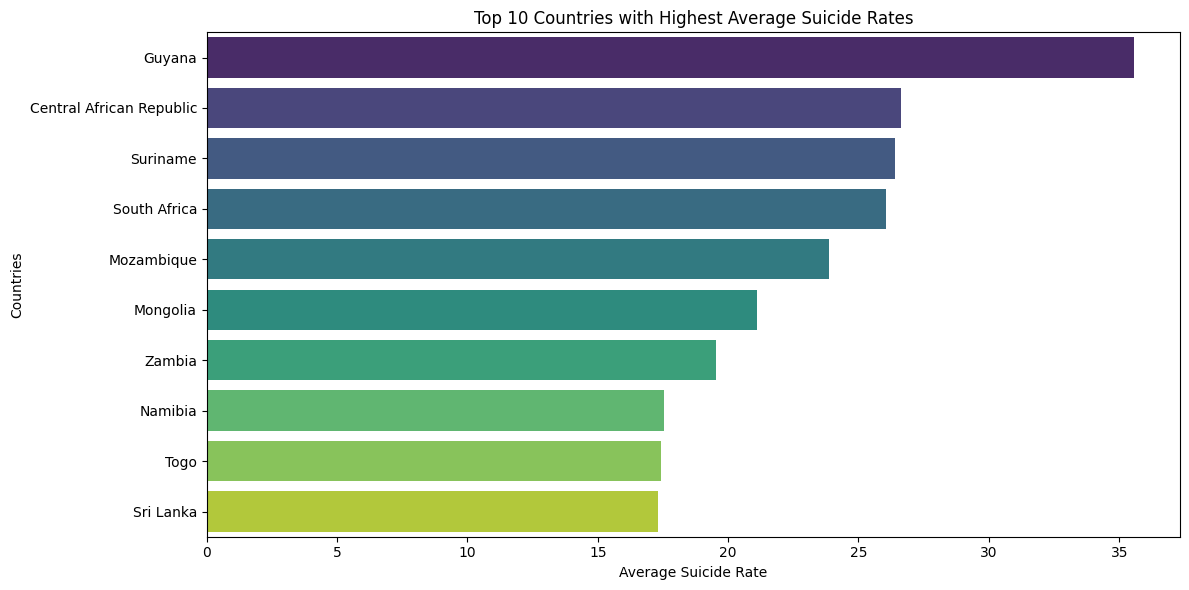

In [4]:
plt.figure(figsize = (12,6))
suicide_rates = df.groupby('Country')['Both sexes'].mean().sort_values(ascending = False).head(10)
sns.barplot(x = suicide_rates.values, y = suicide_rates.index, palette = "viridis", hue = suicide_rates.index, legend = False)
plt.title('Top 10 Countries with Highest Average Suicide Rates')
plt.xlabel('Average Suicide Rate')
plt.ylabel('Countries')
plt.tight_layout()
plt.show()

3. Boxplot of Suicide Rates by Happiness Index Quartiles: This boxplot groups countries into quartiles based on their Happiness Index and it displays the distribution of suicide rates within each quartile. Each quartile represents a range of happiness levels, from low to very high.

The boxplot reveals whether countries with lower happiness levels tend to have higher suicide rates. A significant difference between the quartiles would indicate a strong relationship between happiness and suicide rates.

/var/folders/c2/snb3yrcs1w38z7qd3r208vch0000gn/T/ipykernel_6569/2660671447.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = 'Happiness_Quartile', y = 'Both sexes', palette='Set2')


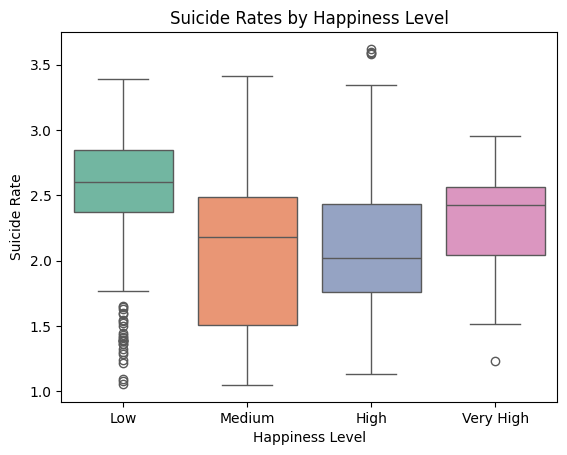

In [5]:
from scipy import stats
import numpy as np

z_value_df = df
ori_value = z_value_df['Both sexes']
z_scores = np.abs(stats.zscore(ori_value))
outliers = ori_value[z_scores > 3]
z_value_df['Both sexes'] = np.log(z_value_df['Both sexes'] + 1)

z_value_df['Happiness_Quartile'] = pd.qcut(z_value_df['Happiness Index'], 4, labels = ['Low', 'Medium', 'High', 'Very High'])
sns.boxplot(data = df, x = 'Happiness_Quartile', y = 'Both sexes', palette='Set2')
plt.xlabel('Happiness Level')
plt.ylabel('Suicide Rate')
plt.title('Suicide Rates by Happiness Level')
plt.show()

4. Histogram of Suicide Rates Distribution: This histogram shows the distribution of suicide rates across all countries. The x-axis represents different ranges of suicide rates, and the y-axis shows the frequency of countries falling within those ranges.

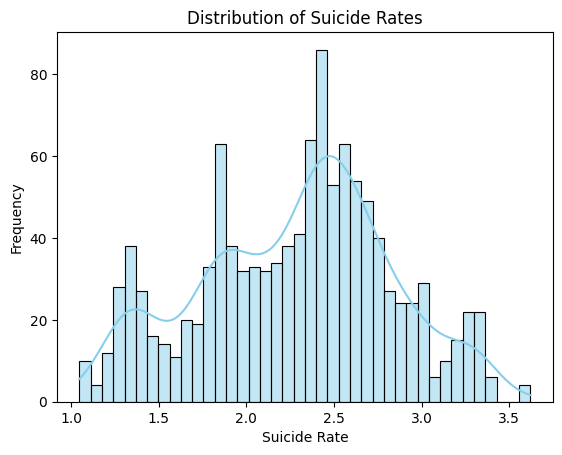

In [6]:
sns.histplot(data = df, x = 'Both sexes', bins = 40, kde = True, color='skyblue')
plt.xlabel('Suicide Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Suicide Rates')
plt.show()

5. Bubble Plot of Suicide Rates vs. Population: This plot is a bubble chart depicting the relationship between suicide rates and population across countries, with additional information conveyed by the Happiness Index and population size.
​
Many countries are clustered towards the lower left, indicating that most countries have smaller populations and lower suicide rates.
​
​The color gradient shows countries with both high and low suicide rates, regardless of their happiness index. Some countries with high happiness scores (red) still have moderate suicide rates, while some countries with low happiness scores (blue) have a wide range of suicide rates.

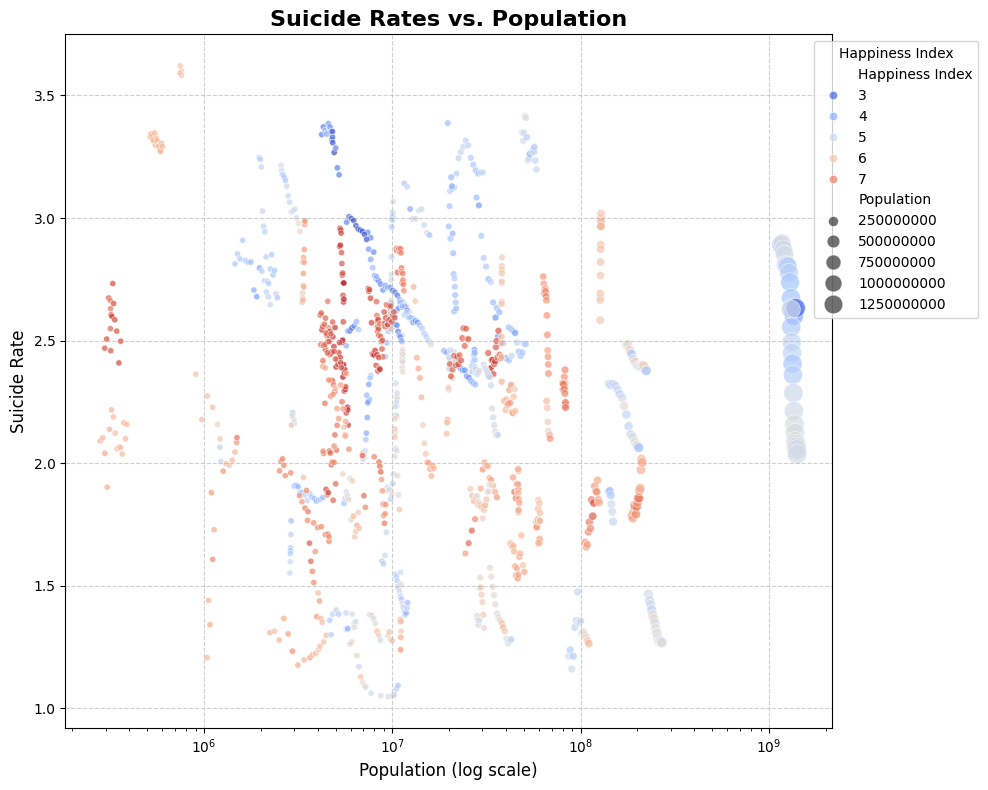

In [7]:
# Create a scatterplot with improvements
plt.figure(figsize=(10, 8))

# Add scatterplot with color mapping and point size based on population
sns.scatterplot(
    data = z_value_df, 
    x = 'Population', 
    y = 'Both sexes', 
    hue = 'Happiness Index',  # Use color based on 'Happiness Index'
    size = 'Population',      # Adjust point size based on population
    sizes = (20, 200),        # Set a range for point sizes
    alpha = 0.7,              # Add transparency
    palette = 'coolwarm',     # Set a visually appealing color palette
    edgecolor = 'w',          # Add white edgecolor for visibility
    linewidth = 0.5           # Set edge thickness
)

# Add title and axis labels
plt.title('Suicide Rates vs. Population', fontsize=16, fontweight='bold')
plt.xlabel('Population (log scale)', fontsize=12)
plt.ylabel('Suicide Rate', fontsize=12)

# Scale the x-axis logarithmically for better visualization if necessary
plt.xscale('log')

# Add grid for readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust the legend
plt.legend(title='Happiness Index', loc='upper right', bbox_to_anchor=(1.2, 1))

# Show the plot
plt.tight_layout()
plt.show()

6. Bubble Plot of Suicide Rates, GDP, and Population

This bubble plot visualizes the relationship between suicide rates, GDP, and population size. The size of each bubble represents the population size, with suicide rates on the y-axis and GDP on the x-axis.

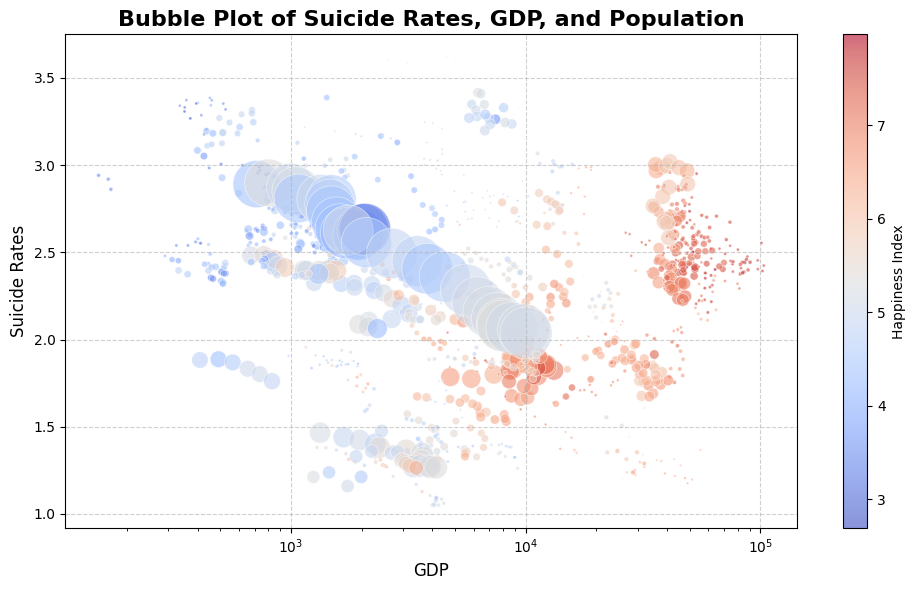

In [8]:
# Create a figure with a larger size
plt.figure(figsize=(10, 6))

# Create the bubble plot with enhancements
scatter = plt.scatter(
    df['GDP'], df['Both sexes'], 
    s=df['Population'] / 1000000,  # Adjust size scaling for better bubble visualization
    alpha=0.6,                    # Transparency to handle overlap
    c=df['Happiness Index'],      # Color bubbles based on 'Happiness Index'
    cmap='coolwarm',              # Use a visually appealing color map
    edgecolor='w',                # Add a white edge to bubbles for clarity
    linewidth=0.5
)

# Add a color bar for the Happiness Index
plt.colorbar(scatter, label='Happiness Index')

# Set axis labels and title
plt.xlabel('GDP', fontsize=12)
plt.ylabel('Suicide Rates', fontsize=12)
plt.title('Bubble Plot of Suicide Rates, GDP, and Population', fontsize=16, fontweight='bold')

# Optionally apply a logarithmic scale to the x-axis for better visualization
plt.xscale('log')

# Add grid lines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Adjust layout for better presentation
plt.tight_layout()

# Show the plot
plt.show()


7. Heatmap by all correlations: This show the correlation about these factors (male_suicide_rate, female_suicide_rate, both_suicide_rate, GDP, Population, Happiness Index, Temperature)
​
Although we are looking for the suicide rate with other factors, this picture shows happiness index is proportional to GDP. This means the happiness index getting higher, and GDP would be greater.

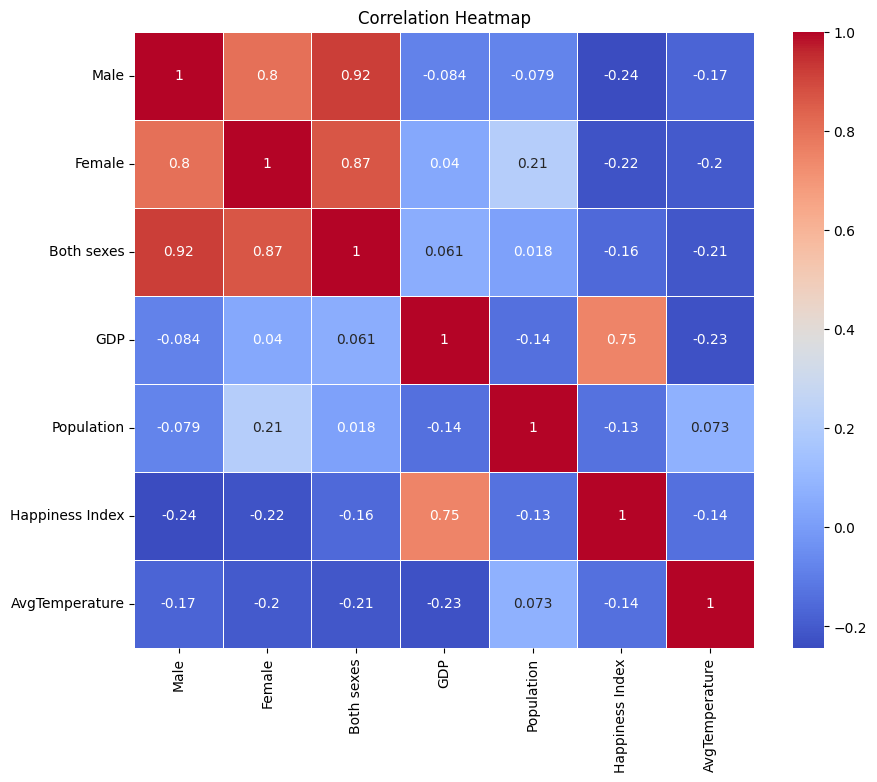

In [9]:
#Data Similarity and Correlation
corr_df = df.loc[:, ['Male', 'Female', 'Both sexes', 'GDP', 'Population', 'Happiness Index', 'AvgTemperature']]
correlation_matrix = corr_df.corr()
# print("Correlation Matrix:\n", correlation_matrix)

# Heatmap of Correlation Matrix
plt.figure(figsize = (10, 8))
sns.heatmap(correlation_matrix, annot = True, cmap = "coolwarm", linewidths = 0.5)
plt.title("Correlation Heatmap")
plt.show()

8. Line plot by Suicide rates over time for both males and females: Shows the male and female suicide rates over time, highlighting the differences between genders.

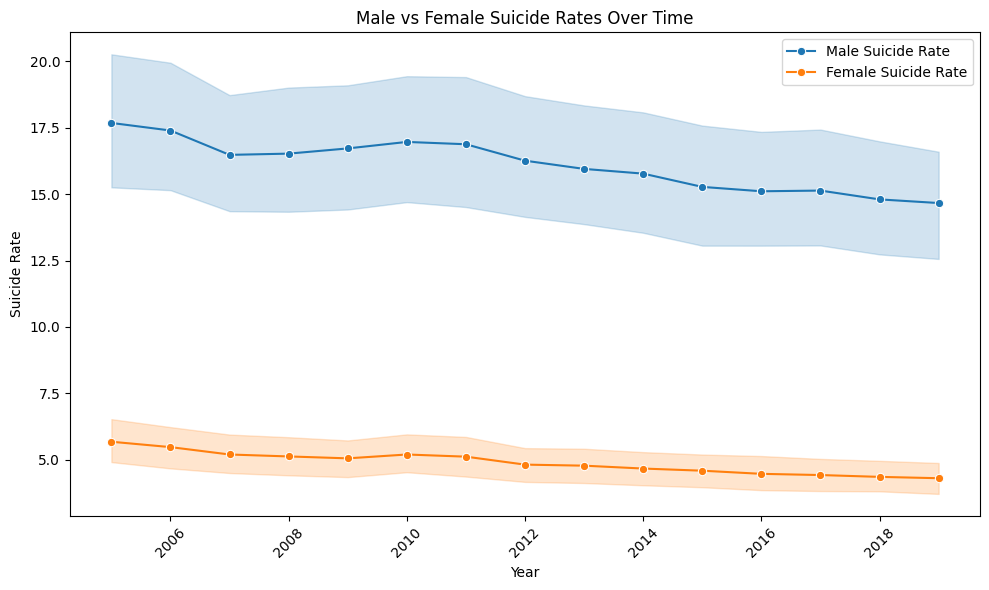

In [10]:
plt.figure(figsize = (10,6))
sns.lineplot(data = df, x = 'Year', y = 'Male', label = 'Male Suicide Rate', marker = "o")
sns.lineplot(data = df, x = 'Year', y = 'Female', label = 'Female Suicide Rate', marker = "o")
plt.title('Male vs Female Suicide Rates Over Time')
plt.ylabel('Suicide Rate')
plt.xlabel('Year')
plt.legend()
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

9. Box plot: Distribution of suicide rates by country  

Displays the distribution of suicide rates by country, helping to visualize variability across different nations.

/var/folders/c2/snb3yrcs1w38z7qd3r208vch0000gn/T/ipykernel_6569/1708745277.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = z_value_df, x = 'Region', y = 'Both sexes', palette = 'Set3', hue = None, legend = False)


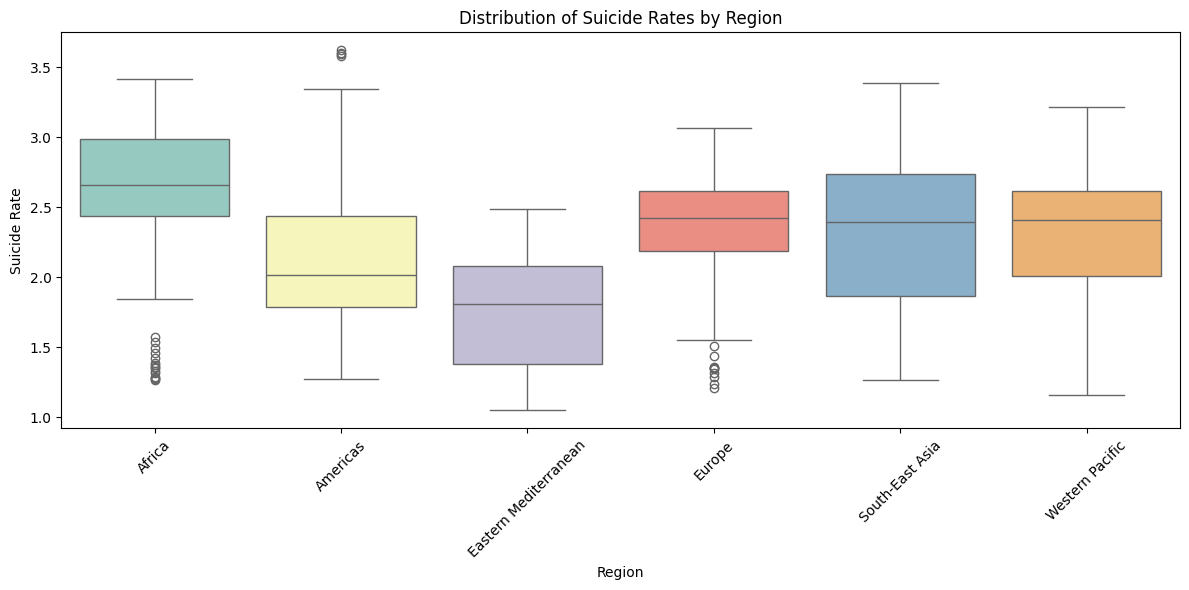

In [11]:
plt.figure(figsize = (12,6))
sns.boxplot(data = z_value_df, x = 'Region', y = 'Both sexes', palette = 'Set3', hue = None, legend = False)
plt.xticks(rotation = 90)
plt.title('Distribution of Suicide Rates by Region')
plt.xticks(rotation=45)
plt.ylabel('Suicide Rate')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

10. Scatter plot: GDP vs Happiness Index  

Illustrates the relationship between GDP and the Happiness Index, with data points sized by population and colored by suicide rate.

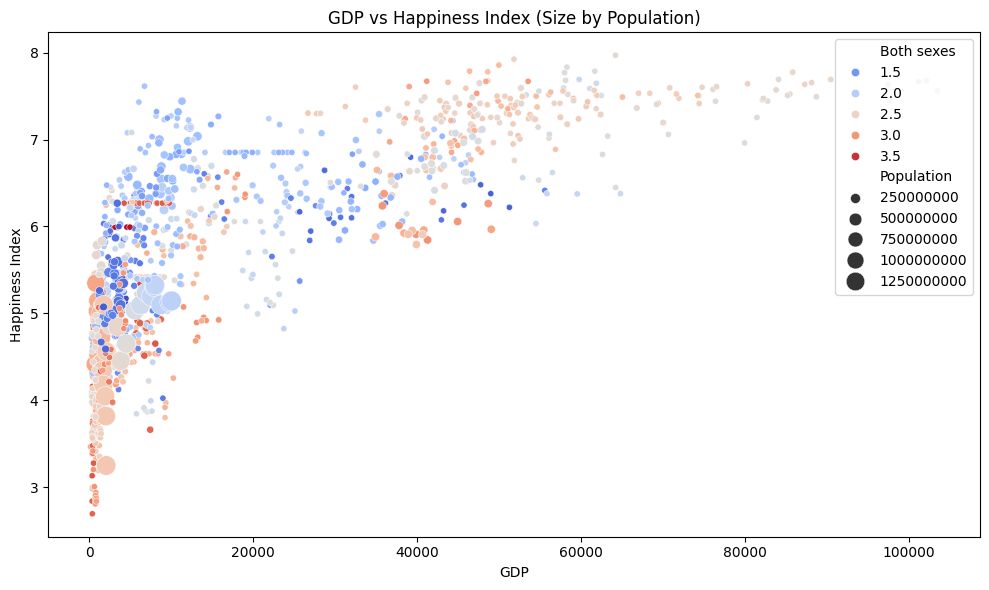

In [12]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = df, x = 'GDP', y = 'Happiness Index', hue = 'Both sexes', size = 'Population', sizes = (20, 200), palette = 'coolwarm')
plt.title('GDP vs Happiness Index (Size by Population)')
plt.xlabel('GDP')
plt.ylabel('Happiness Index')
plt.legend(loc = 'upper right')
plt.tight_layout()
plt.show()

11. Scatter plot: A scatter plot exploring the relationship between temperature and the happiness index.

Text(0.5, 1.0, 'Temperature vs Happiness Index')

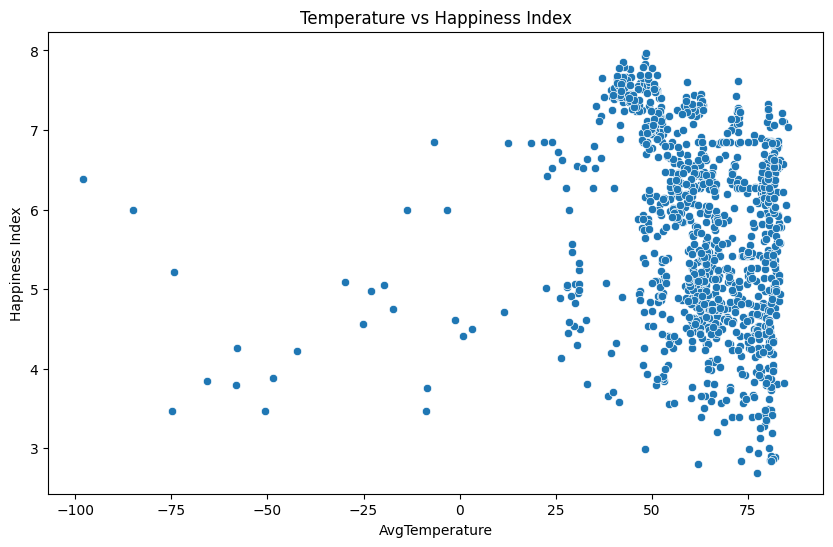

In [13]:
plt.figure(figsize = (10,6))
sns.scatterplot(x = 'AvgTemperature', y = 'Happiness Index', data = df)
plt.title('Temperature vs Happiness Index')

12. Scatter plot: A scatter plot exploring the relationship between temperature and the both genders suicide rate. This plot shows that the temperature is lower than 13 degrees, the suicide rate would be higher than warmer temperature.

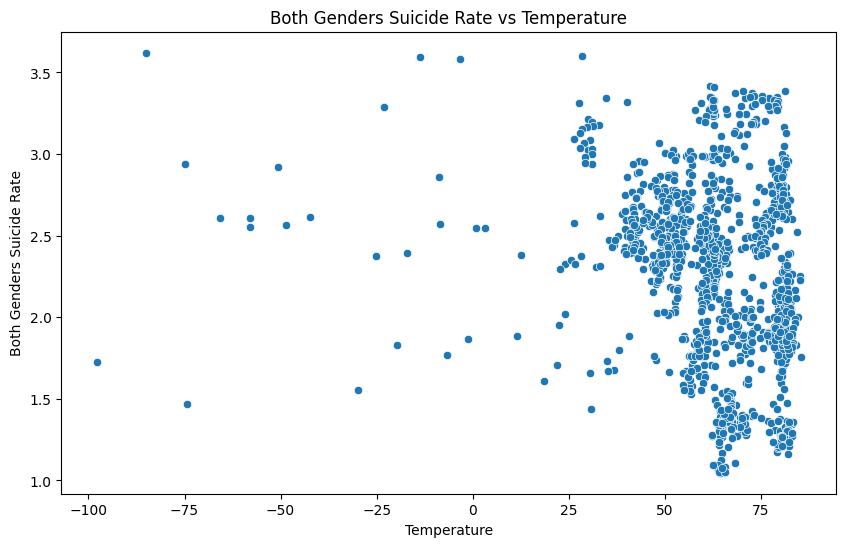

In [14]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='AvgTemperature', y='Both sexes', data=df)
plt.title('Both Genders Suicide Rate vs Temperature')
plt.xlabel('Temperature')
plt.ylabel('Both Genders Suicide Rate')
plt.show()

13. Pie chart: This shows that male's and female's suicide rate. It shows that male's suicide rate is higher than female's. Therefore, psychologist might focus on male's mind more.

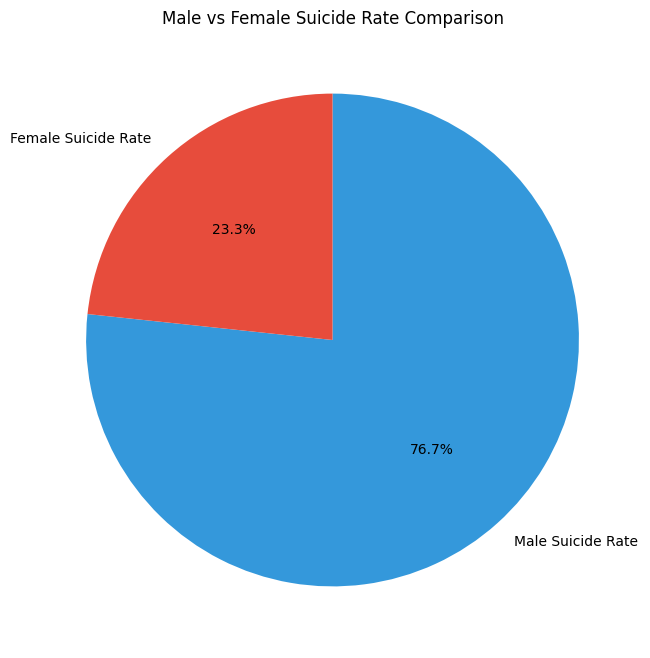

In [15]:
male_suicide_total = df['Male'].mean()
female_suicide_total = df['Female'].mean()

labels = ['Male Suicide Rate', 'Female Suicide Rate']
sizes = [male_suicide_total, female_suicide_total]
colors = ['#3498db', '#e74c3c']

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.title('Male vs Female Suicide Rate Comparison')
plt.show()


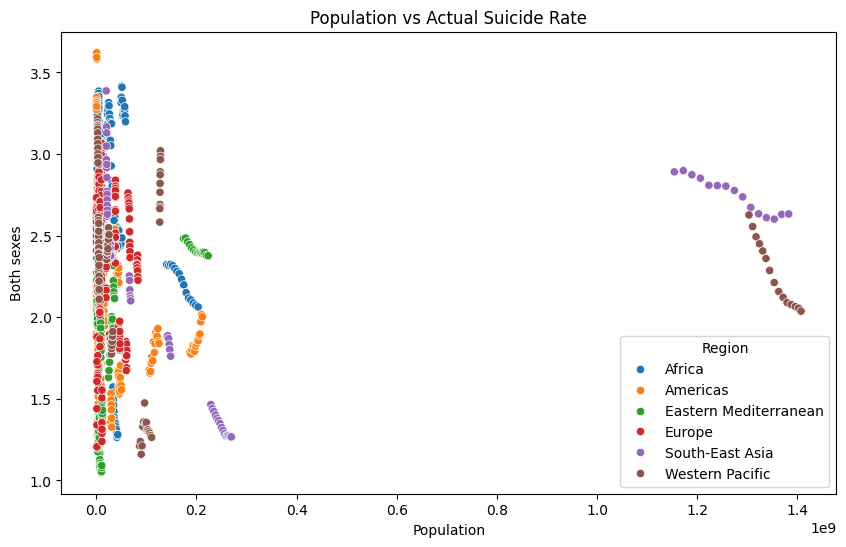

In [16]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Population', y='Both sexes', hue='Region', data=df)
plt.title('Population vs Actual Suicide Rate')
plt.show()

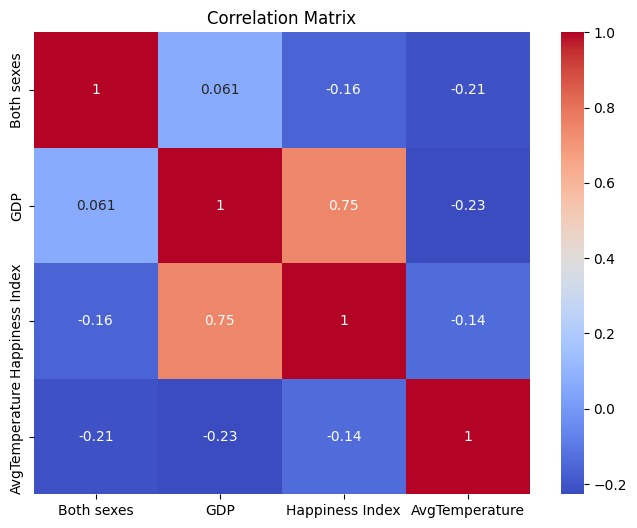

In [17]:
plt.figure(figsize=(8,6))
corr = df[['Both sexes', 'GDP', 'Happiness Index', 'AvgTemperature']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [43]:
init_notebook_mode(connected=True)
data = dict(type = 'choropleth', 
           locations = df['Country'],
           locationmode = 'country names',
           z = df['Both sexes'], 
           text = df['Country'],
           colorbar = {'title':'Both sexes'})
layout = dict(title = 'Suicide Rate of Both Sexes from 2005 to 2019', 
             geo = dict(showframe = False))
choromap3 = go.Figure(data = [data], layout=layout)
choromap3 

In [50]:
suicide_df = pd.read_csv('./clean_data/age_standardized_suicide_rates.csv')
suicide_df.drop(suicide_df.columns[[0]], axis = 1)
suicide_df = suicide_df.pivot(index=['Region', 'Country', 'Year'], columns=['Sex'], values='actual suicide rate').reset_index()

z_value_df = suicide_df
ori_value = z_value_df['Both sexes']
z_scores = np.abs(stats.zscore(ori_value))
z_value_df['Both sexes'] = np.log(z_value_df['Both sexes'] + 1)

suicide_df.loc[:] = z_value_df

init_notebook_mode(connected=True)
data = dict(type = 'choropleth', 
           locations = suicide_df['Country'],
           locationmode = 'country names',
           z = suicide_df['Both sexes'], 
           text = df['AvgTemperature'],
           colorbar = {'title':'suicide rate of both sexes'})
layout = dict(title = 'Suicide Rate of Both Sexes from 2000 to 2019', 
             geo = dict(showframe = False))
choromap3 = go.Figure(data = [data], layout=layout)
choromap3 

In [42]:
df.describe()

,Year,AvgTemperature,Happiness Index,GDP,Population,Both sexes,Female,Male
count,1141.000000,1141.000000,1141.000000,1141.000000,1.141000e+03,1141.000000,1141.000000,1141.000000
mean,2011.796670,61.710372,5.709026,17731.703703,6.570817e+07,2.279659,4.910123,16.145223
std,4.324636,20.092315,1.176341,21238.398575,2.113988e+08,0.548761,3.041930,10.325237
min,2005.000000,-97.900581,2.693000,151.188041,2.803750e+05,1.047319,0.600000,2.780000
25%,2008.000000,52.781967,4.812000,2218.197257,5.084532e+06,1.879465,2.330000,8.410000
50%,2012.000000,63.713661,5.770000,7085.121978,1.079649e+07,2.373044,4.460000,14.460000
75%,2016.000000,76.180328,6.650250,30666.220367,3.797483e+07,2.645465,6.720000,20.110000
max,2019.000000,85.438356,7.971000,103532.541013,1.407745e+09,3.620868,18.370000,57.710000


In [41]:
suicide_df.describe()

Sex,Year,Both sexes,Female,Male
count,3660.000000,3660.000000,3660.000000,3660.000000
mean,2009.500000,11.744354,5.396249,18.742249
std,5.767069,9.846841,4.196625,16.995431
min,2000.000000,0.000000,0.000000,0.000000
25%,2004.750000,5.570000,2.487500,8.250000
50%,2009.500000,9.755000,4.745000,14.475000
75%,2014.250000,14.872500,7.240000,23.870000
max,2019.000000,116.200000,46.340000,195.200000
